<a href="https://colab.research.google.com/github/ZKellock/MAT421/blob/main/MAT421ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20.1 Numerical Differentiation**
*   Uses a numerical grid, an evenly spaced set of points over the domain of a function
*   The spacing or step size is the distance between adjacent points on the grid

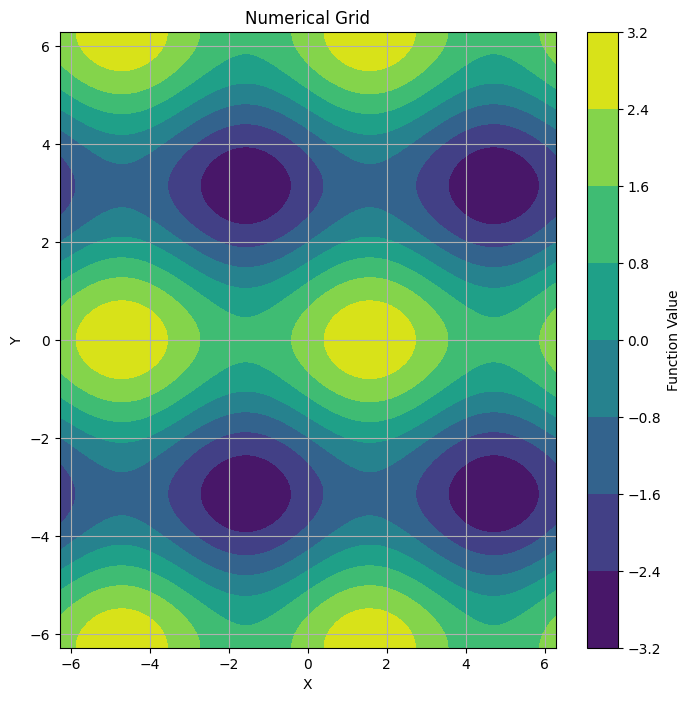

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_grid(x_start, x_end, y_start, y_end, num_points_x, num_points_y):
    x = np.linspace(x_start, x_end, num_points_x)
    y = np.linspace(y_start, y_end, num_points_y)
    X, Y = np.meshgrid(x, y)
    return X, Y

x_start, x_end = -2*np.pi, 2*np.pi
y_start, y_end = -2*np.pi, 2*np.pi
num_points_x, num_points_y = 100, 100
X, Y = generate_grid(x_start, x_end, y_start, y_end, num_points_x, num_points_y)

Z = np.sin(X) + 2*np.cos(Y)

plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Numerical Grid')
plt.grid(True)
plt.show()

**20.2 Finite Difference Approximating Derivatives**
*   Derivative is a function of the slope of a function at every point
*   Finite difference approximations use values near a point 'a'
*   Forward difference: Estimate the slope of the function at xj using the line that connects $(x_j, f(x_j))$ and $(x_j+1, f(x_j+1))$
*   Backward Difference: Estimate the slope of the function at xj using the line that connects $(x_j-1, f(x_j-1))$ and $(x_j, f(x_j))$
*   Central Difference: Estimate the slope of the function at xj using the line that connects $(x_j-1, f(x_j-1))$ and $(x_j+1, f(x_j+1))$
*   These implementations can also be achieved via Taylor Series

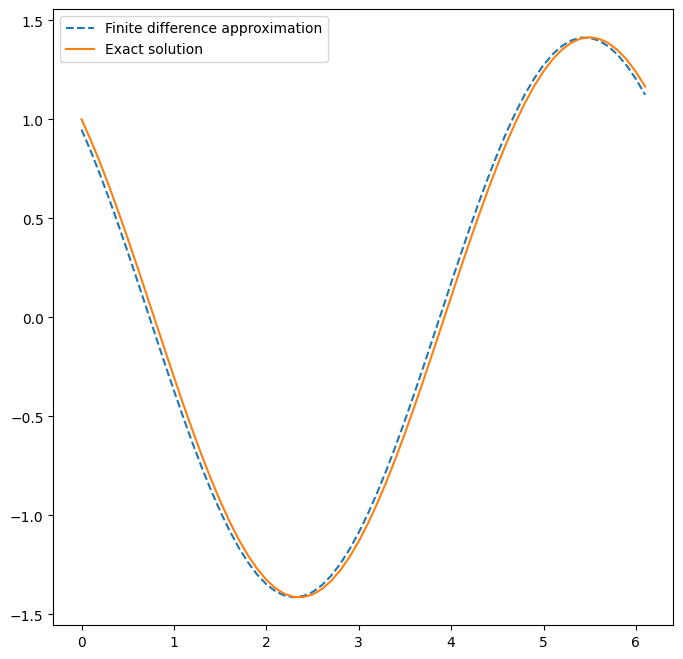

Max Error: 0.07068961714190192


In [4]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.cos(x) + np.sin(x)

forward_diff = np.diff(y)/h
x_diff = x[:-1:]
exact_solution = np.cos(x_diff) -np.sin(x_diff)

plt.figure(figsize = (8, 8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution,     label = 'Exact solution')
plt.legend() ; plt.show()

max_error = max(abs(exact_solution - forward_diff))
print("Max Error: " + str(max_error))

**20.3 Approximating Higher Order Derivatives**
*   Taylor Series can be used to approximate higher order derivatives

**20.4 Numerical Differentiation with Noise**
*   Data can be contaminated with noise
*   Values can differ by small amounts compared to mathematical calculations
*   The influence of noise can differ in each case, the resulting application may not be usable if the noise influence is too large

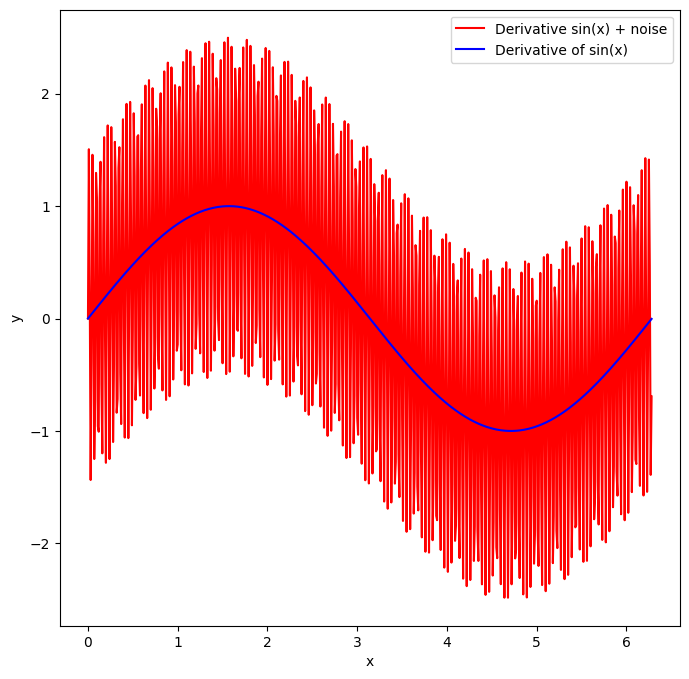

In [7]:
x = np.arange(0, 2*np.pi, 0.01)
omega = 150
epsilon = 0.01

x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x)
y_noise = y + epsilon*omega*np.sin(omega*x)

plt.figure(figsize = (8, 8))
plt.plot(x, y_noise, 'r-',  label = 'Derivative sin(x) + noise')
plt.plot(x, y      , 'b-',  label = 'Derivative of sin(x)')

plt.xlabel('x') ; plt.ylabel('y')
plt.legend()    ; plt.show()